In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings(action= 'ignore')

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/PrathameshR10/Assignments/main/Folder/Titanic_train.csv')

In [3]:
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# from data, columns Name, passengerid, ticket and cabin seem not so important for model building.
# majority of data from cabin column is missing (687 out of 891 missing)
# Above columns will not add any value to predict if person survived or not, so we will drop these unnecessary columns.

In [6]:
df_train.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
df_train

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [7]:
df_train.shape

(891, 8)

In [8]:
# Pclass = Passenger Class 
# SibSp = Siblings or spouse of passenger onboard 
# Parch = how many children and parents of passenger onboard
# Embarked = location passenger embarked the titanic

In [9]:
df_train.info()               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### Missing values

In [10]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
# Age column and its mean will be affected by outliers, thus missing values will be replaced by median value
# Embarked column is categorical in nature thus it's missing values can be replaced by mode value

In [12]:
df_train.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [13]:
df_train.describe(include=object)

Sex Embarked
count    891      889
unique     2        3
top     male        S
freq     577      644

In [14]:
# Out of 889 data points, mode of embarked column is S, which can be used to replace 2 missing values

In [15]:
df_train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [16]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [17]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [18]:
pe.box(df_train['Age'], orientation='h')             # Age column shows presence of outliers

In [19]:
df_train['Age'].median()

28.0

In [20]:
df_train["Age"].fillna(df_train['Age'].median(),inplace=True)

In [21]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Duplicated Values

In [22]:
df_train.duplicated().sum()

116

In [23]:
df_train.drop_duplicates(inplace=True)

In [24]:
df_train.duplicated().sum()

0

In [25]:
df_train.shape

(775, 8)

### Outlier Treatment/Data Transformation

In [26]:
df_train.info()       

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    object 
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.5+ KB


In [27]:
pe.box(df_train[['Age','Parch','Fare']])

In [28]:
# Rest of the columns are categorical in nature.
# some are binary e.g: Sex & Survived, some are multiclass e.g: Embarked, Pclass
# Even Parch column after combining few values into one can be treated as categorical column
# Fare column has extremely high outliers we will use capping method on that column
# Also log transformation cannot be used even on numerical columns as some have 0 as a value. 

In [29]:
def outlier_capping(data, columns):
    Q1 = df_train[columns].quantile(0.25)
    Q3 = df_train[columns].quantile(0.75)
    IQR = Q3 -Q1
    
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    
    df_train[columns] = df_train[columns].clip(lower=lower_cap, upper=upper_cap, axis = 1)
    return df_train

cap_columns = ['Fare','Parch']
cap_df_train = outlier_capping(df_train, cap_columns)

In [30]:
pe.box(df_train[['Fare','Parch']])

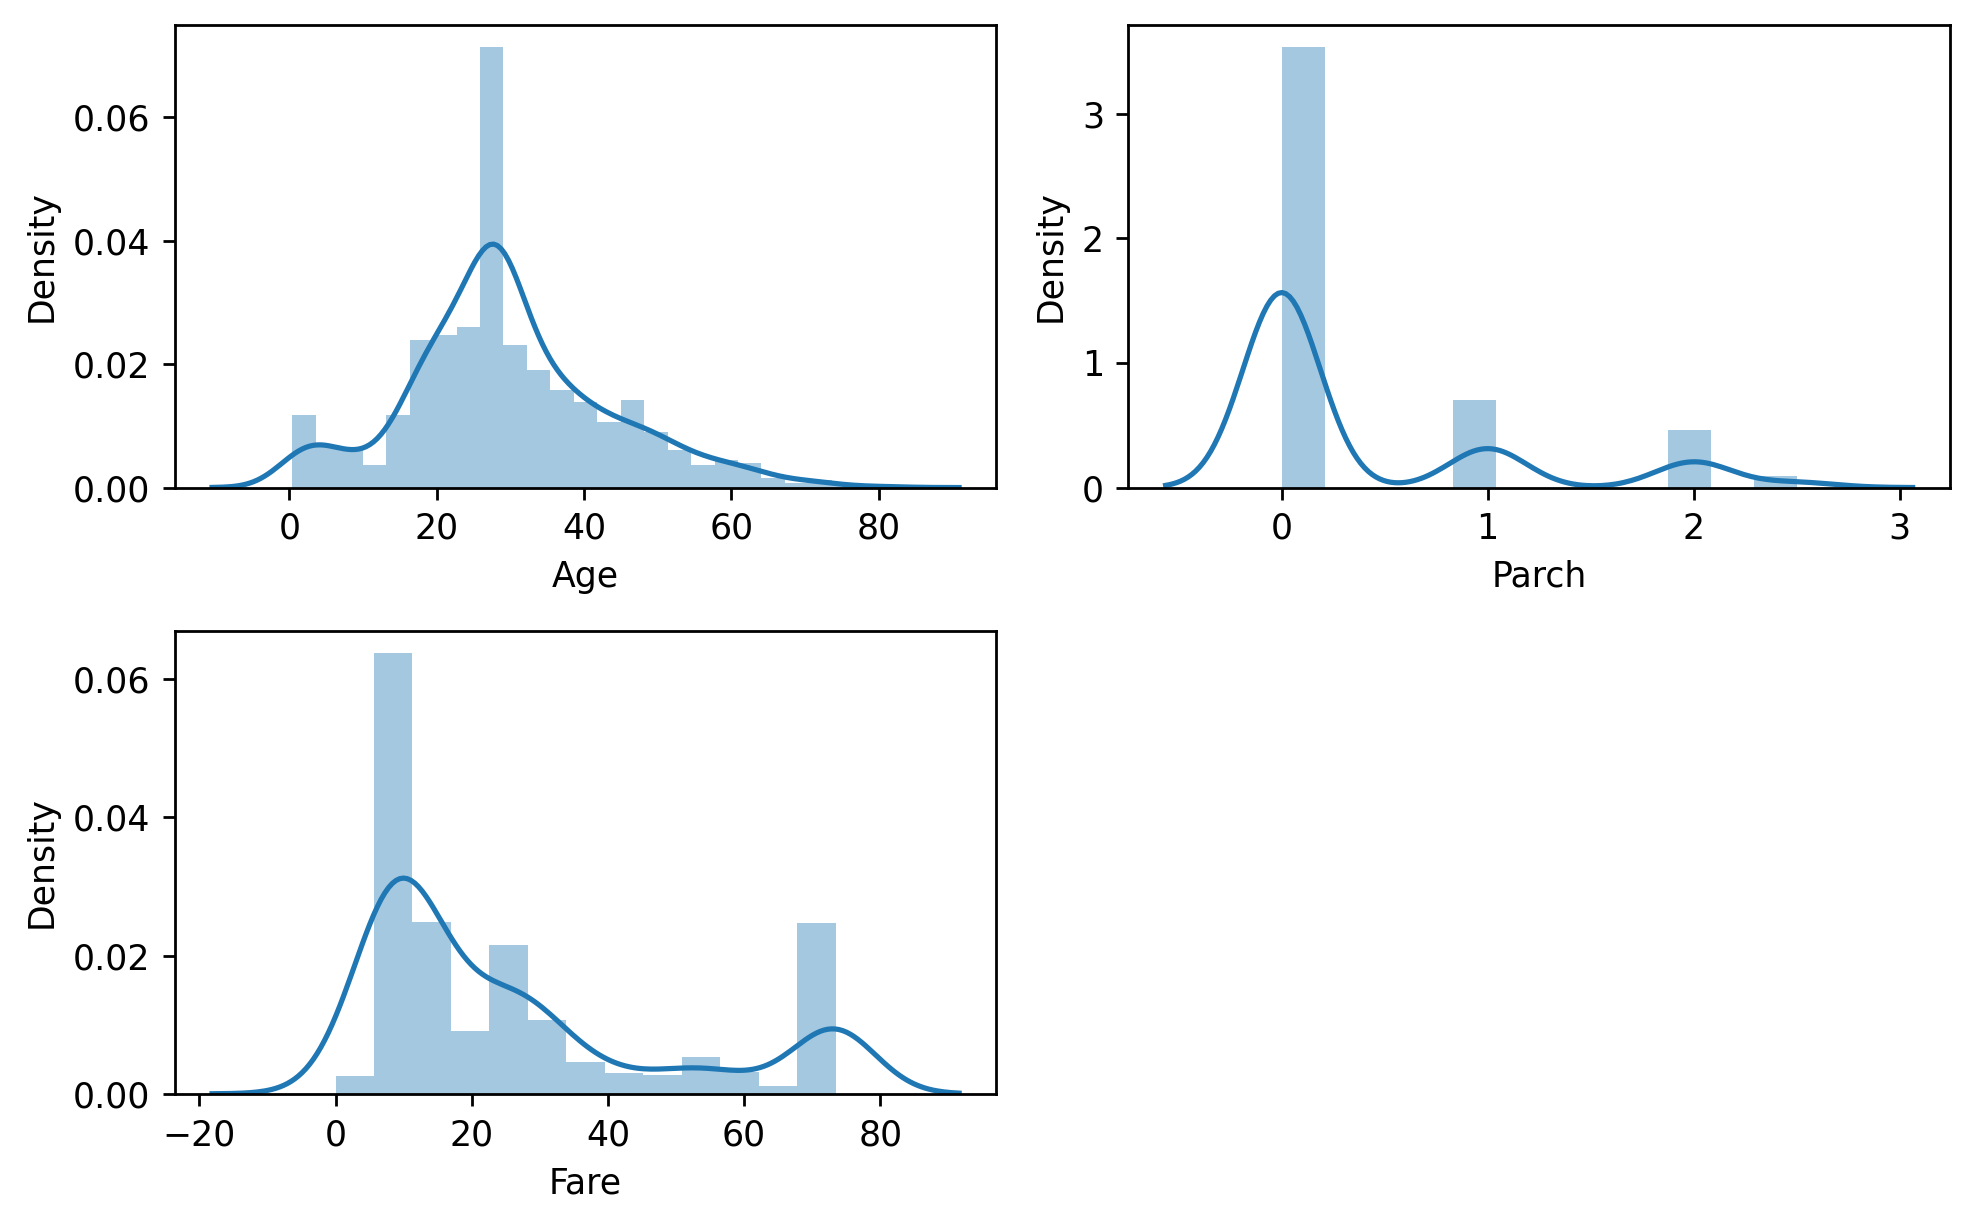

In [31]:
plt.subplot(2,2,1)
sns.distplot(x = df_train['Age'])
plt.xlabel('Age')

plt.subplot(2,2,2)
sns.distplot(x = df_train['Parch'])
plt.xlabel('Parch')

plt.subplot(2,2,3)
sns.distplot(x = df_train['Fare'])
plt.xlabel('Fare')

plt.tight_layout()

In [32]:
df_train[['Fare','Age','Parch']].skew()

Fare     1.097576
Age      0.441987
Parch    1.616154
dtype: float64

### Data Insights

In [33]:
df_train['Survived'].value_counts()

0    455
1    320
Name: Survived, dtype: int64

In [34]:
df_train['Sex'].value_counts()

male      483
female    292
Name: Sex, dtype: int64

In [35]:
df_train.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           216
        0            76
male    0           379
        1           104
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

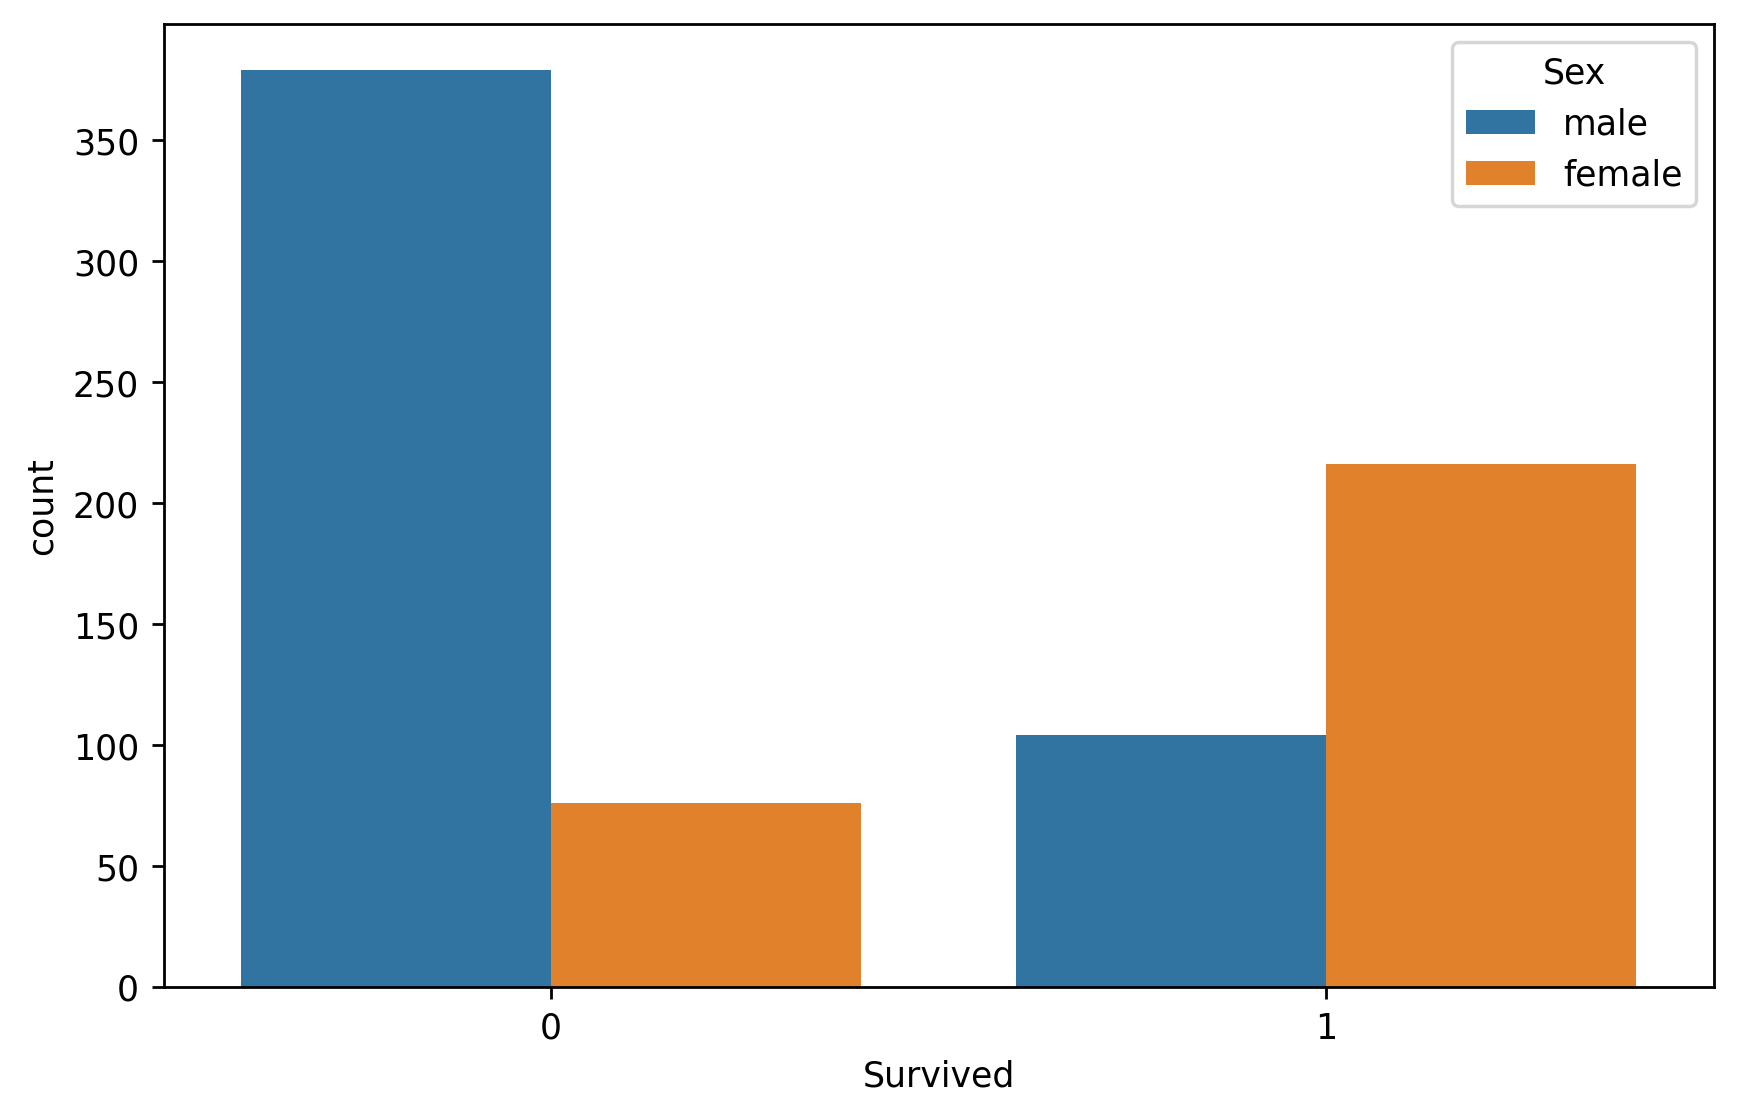

In [36]:
sns.countplot(x = 'Survived',hue='Sex',data = df_train)    

In [37]:
# Above plot shows no. of males and female who survived.
# Out of 455 deaths, 379 were male and 76 were female.

In [38]:
df_train['Pclass'].value_counts()        # Majority of passengers travelling in 3rd class

3    401
1    210
2    164
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

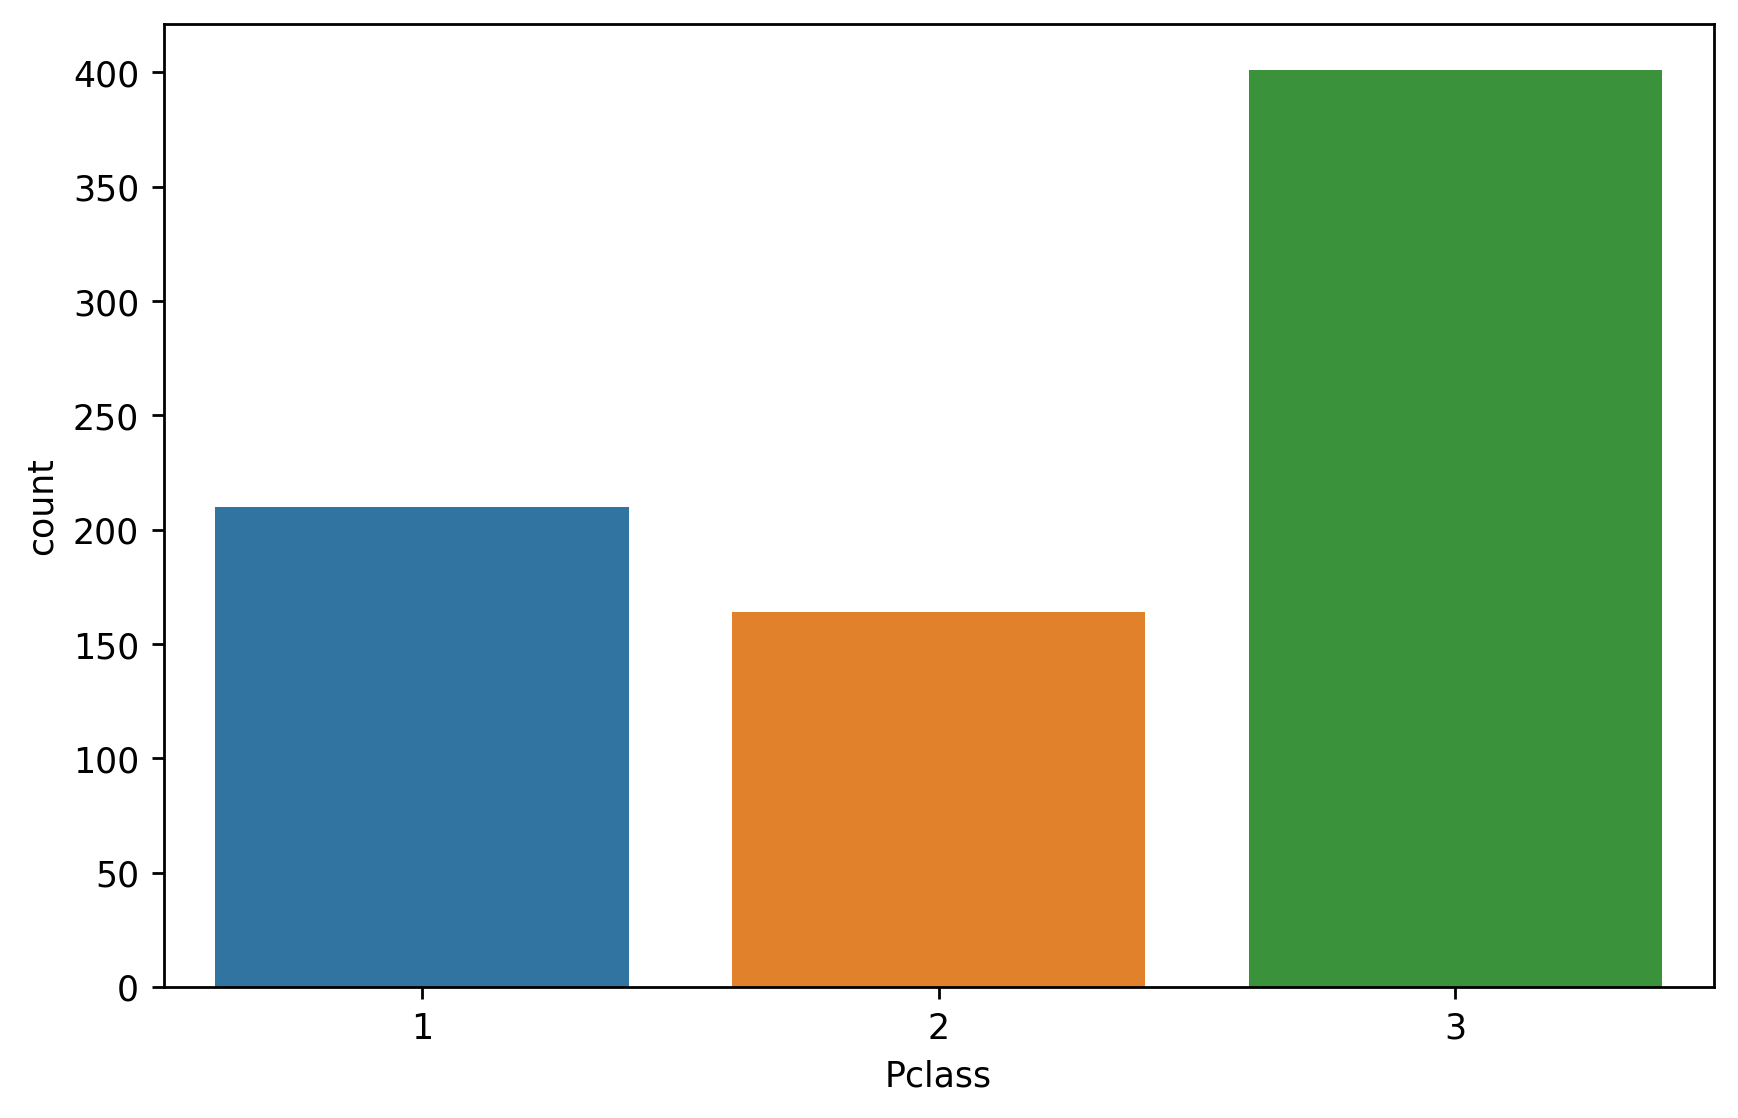

In [39]:
sns.countplot(x = df_train['Pclass'])

In [40]:
df_train['SibSp'].value_counts()           

0    508
1    201
2     27
4     18
3     14
5      5
8      2
Name: SibSp, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

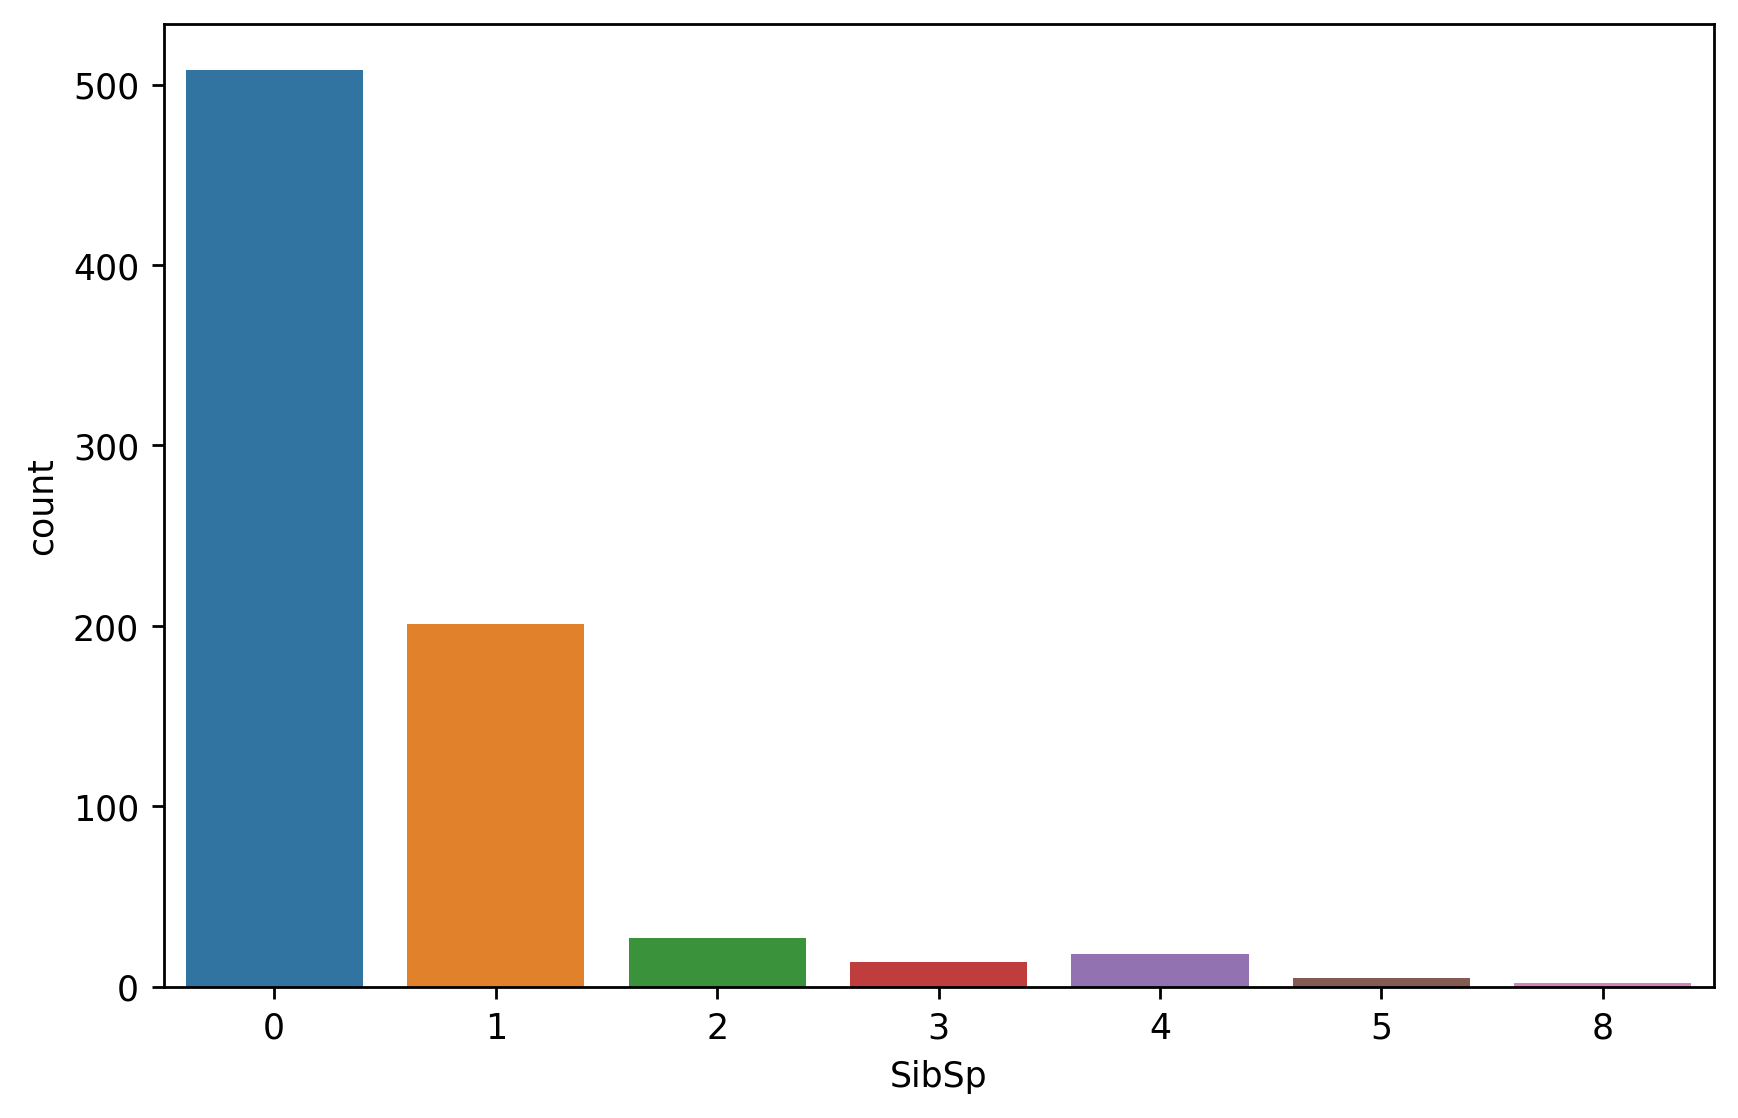

In [41]:
sns.countplot(x = df_train['SibSp'])

In [42]:
# So around 508 people were travelling alone
# around 201 people had their sibling or spouse with them

In [43]:
df_train[df_train['SibSp'] == 0].Sex.value_counts()

male      347
female    161
Name: Sex, dtype: int64

In [44]:
# From 508 people travelling alone 347 were male and 161 female

In [45]:
df_train[df_train['SibSp'] == 1].Sex.value_counts()

female    102
male       99
Name: Sex, dtype: int64

In [46]:
# Out of 201 people travelling with either spouse or sibling 102 were female and 99 were male
# Most of these could be couples travelling

<Axes: ylabel='Density'>

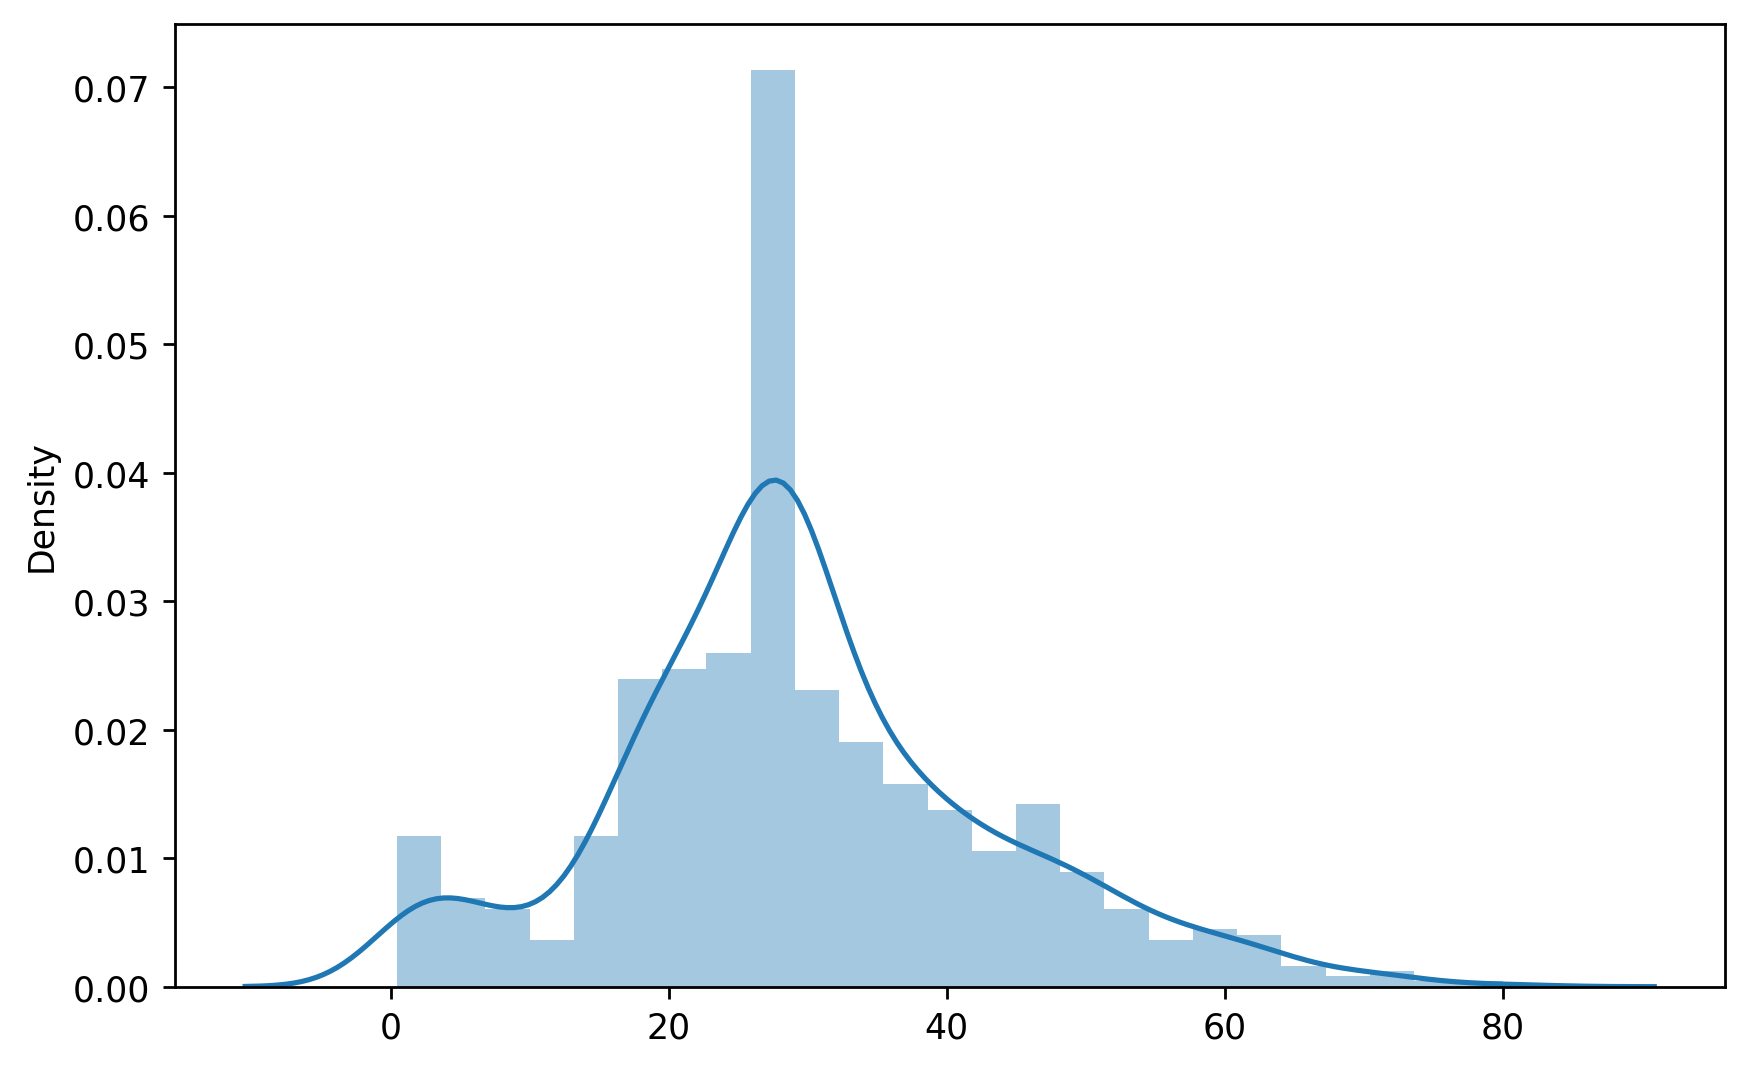

In [47]:
sns.distplot(x = df_train['Age'])

<Axes: xlabel='Parch', ylabel='count'>

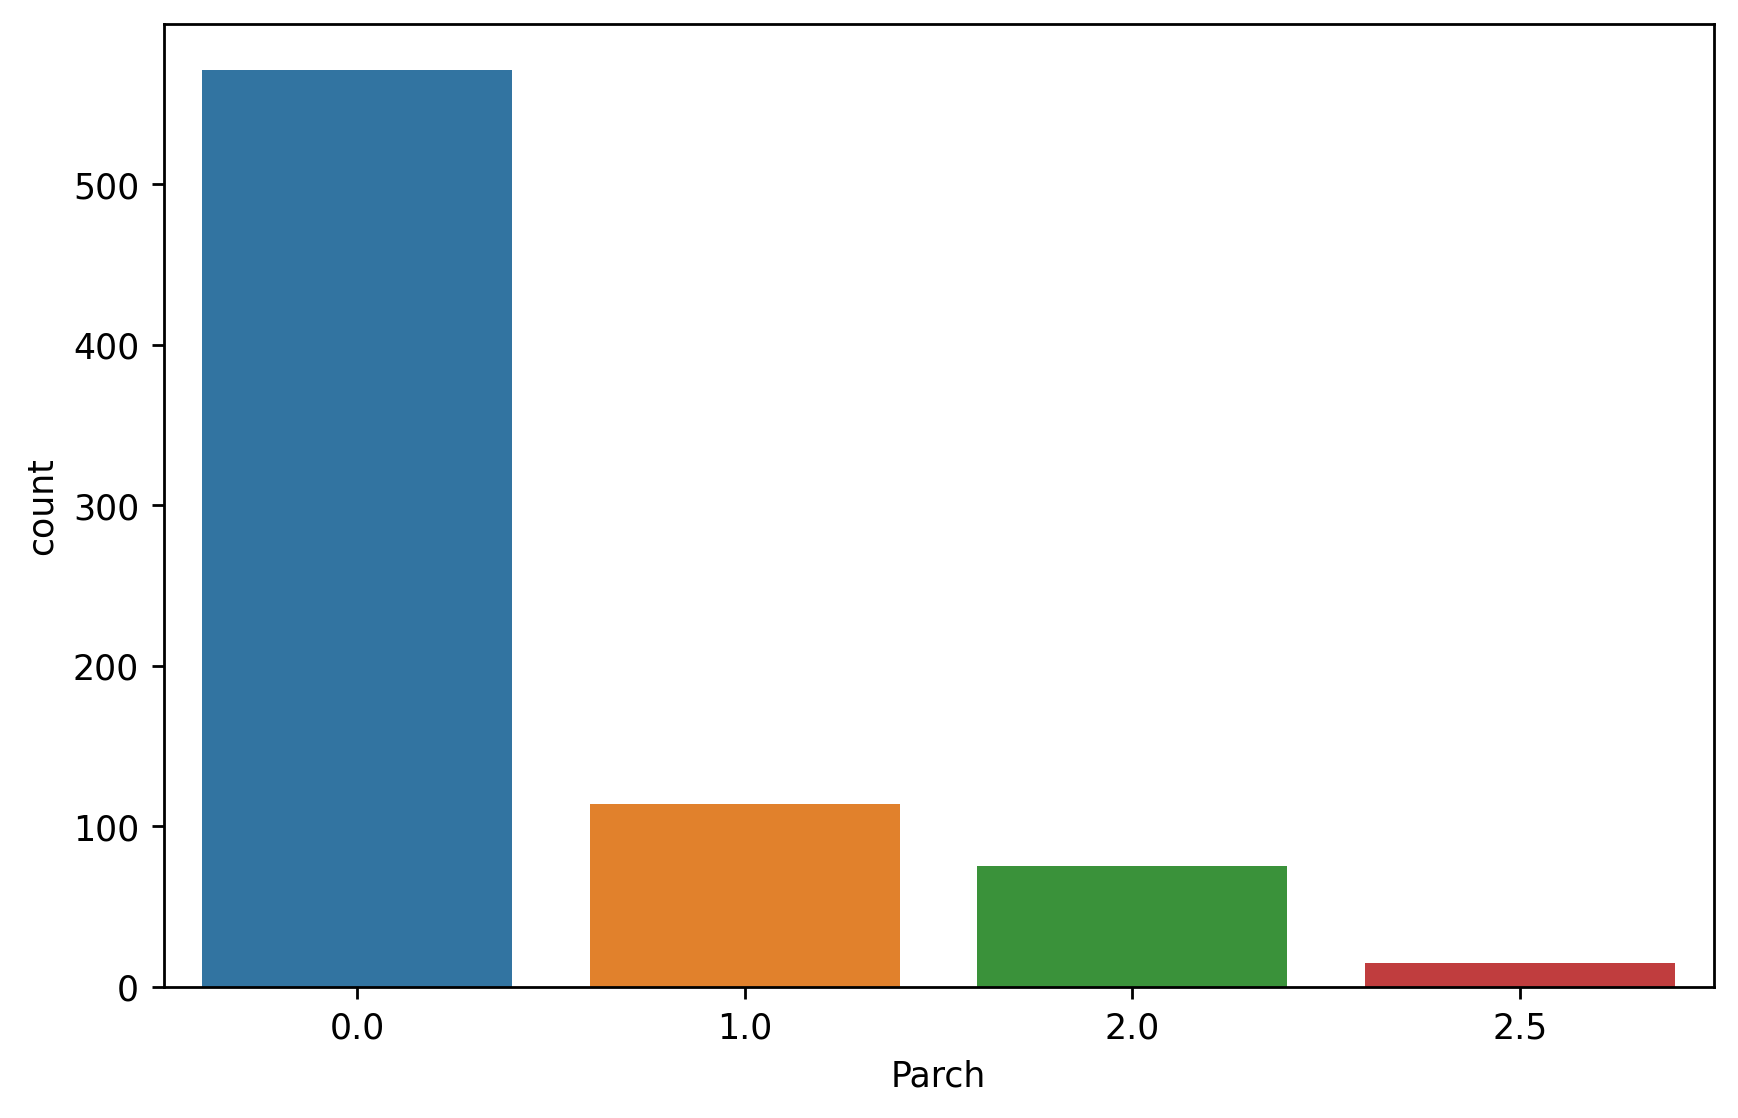

In [48]:
sns.countplot(x = df_train['Parch'])

In [49]:
df_train['Parch'].value_counts()       # Majority people were not with their children and parents onboard

0.0    571
1.0    114
2.0     75
2.5     15
Name: Parch, dtype: int64

### Encoding Categorical Variables

In [50]:
# Using one hot encoding for variables like Parch, Sex, Embarked as these are nominal variables
# Whereas we will use label encoder on Pclass variable as it is ordinal variable.

In [51]:
df_train = pd.get_dummies(df_train, columns=['Parch','Sex','Embarked'],drop_first=True)

In [52]:
df_train

Survived  Pclass   Age  SibSp     Fare  Parch_1.0  Parch_2.0  Parch_2.5  \
0           0       3  22.0      1   7.2500          0          0          0   
1           1       1  38.0      1  71.2833          0          0          0   
2           1       3  26.0      0   7.9250          0          0          0   
3           1       1  35.0      1  53.1000          0          0          0   
4           0       3  35.0      0   8.0500          0          0          0   
..        ...     ...   ...    ...      ...        ...        ...        ...   
885         0       3  39.0      0  29.1250          0          0          1   
887         1       1  19.0      0  30.0000          0          0          0   
888         0       3  28.0      1  23.4500          0          1          0   
889         1       1  26.0      0  30.0000          0          0          0   
890         0       3  32.0      0   7.7500          0          0          0   

     Sex_male  Embarked_Q  Embarked_S  
0           1           0           1  
1           0           0           0  
2           0           0           1  
3           0           0           1  
4           1           0           1  
..        ...         ...         ...  
885         0           1           0  
887         0           0           1  
888         0           0           1  
889         1           0           0  
890         1           1           0  

[775 rows x 11 columns]

In [53]:
label_encoder = LabelEncoder()
df_train['Pclass_Label'] = label_encoder.fit_transform(df_train['Pclass'])

In [54]:
df_train.drop(columns='Pclass',inplace=True)

In [55]:
df_train

Survived   Age  SibSp     Fare  Parch_1.0  Parch_2.0  Parch_2.5  \
0           0  22.0      1   7.2500          0          0          0   
1           1  38.0      1  71.2833          0          0          0   
2           1  26.0      0   7.9250          0          0          0   
3           1  35.0      1  53.1000          0          0          0   
4           0  35.0      0   8.0500          0          0          0   
..        ...   ...    ...      ...        ...        ...        ...   
885         0  39.0      0  29.1250          0          0          1   
887         1  19.0      0  30.0000          0          0          0   
888         0  28.0      1  23.4500          0          1          0   
889         1  26.0      0  30.0000          0          0          0   
890         0  32.0      0   7.7500          0          0          0   

     Sex_male  Embarked_Q  Embarked_S  Pclass_Label  
0           1           0           1             2  
1           0           0           0             0  
2           0           0           1             2  
3           0           0           1             0  
4           1           0           1             2  
..        ...         ...         ...           ...  
885         0           1           0             2  
887         0           0           1             0  
888         0           0           1             2  
889         1           0           0             0  
890         1           1           0             2  

[775 rows x 11 columns]

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      775 non-null    int64  
 1   Age           775 non-null    float64
 2   SibSp         775 non-null    int64  
 3   Fare          775 non-null    float64
 4   Parch_1.0     775 non-null    uint8  
 5   Parch_2.0     775 non-null    uint8  
 6   Parch_2.5     775 non-null    uint8  
 7   Sex_male      775 non-null    uint8  
 8   Embarked_Q    775 non-null    uint8  
 9   Embarked_S    775 non-null    uint8  
 10  Pclass_Label  775 non-null    int64  
dtypes: float64(2), int64(3), uint8(6)
memory usage: 40.9 KB


<Axes: >

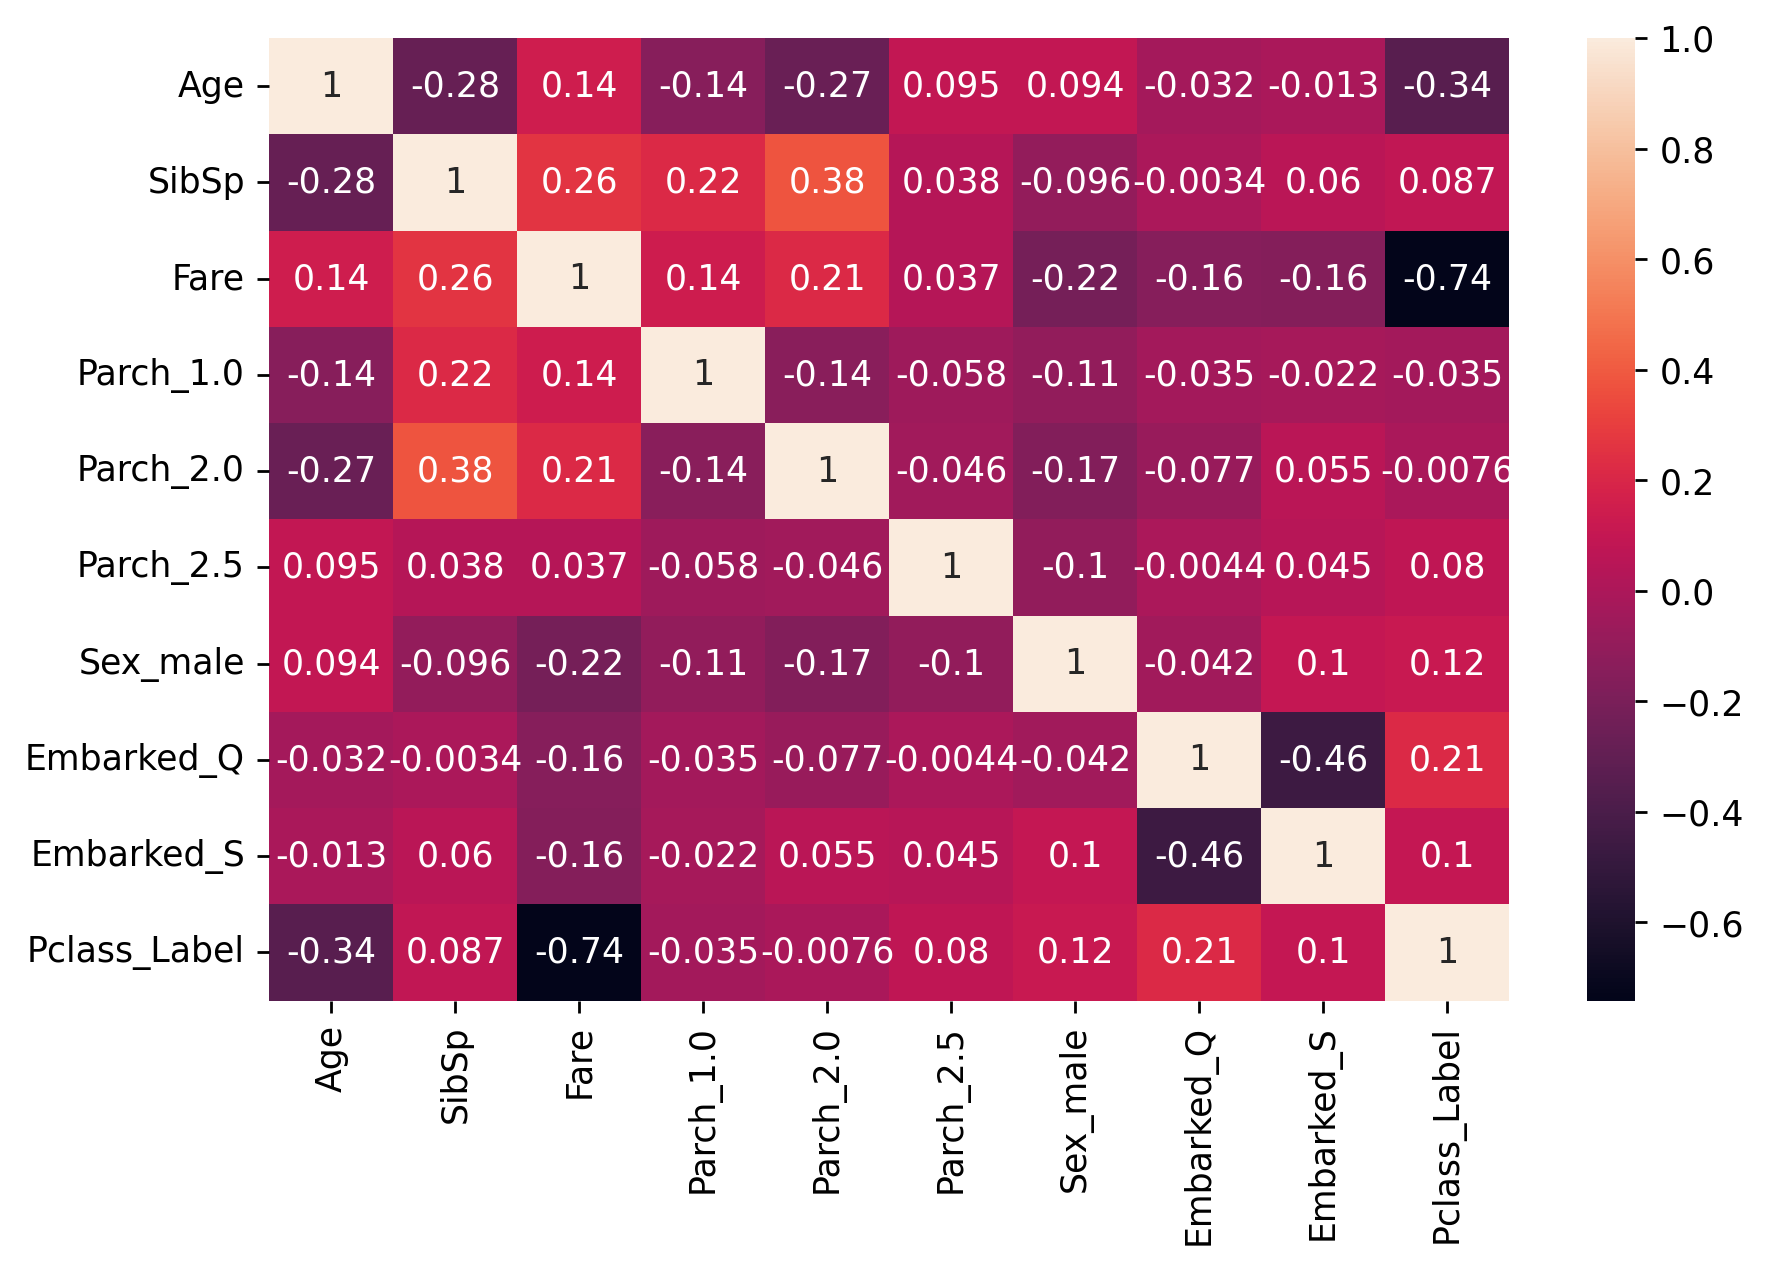

In [57]:
df = df_train.drop('Survived', axis=1).corr()
sns.heatmap(df,annot=True) 

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
data = df_train.drop(columns='Survived')
vif = pd.DataFrame()
vif['features'] = data.columns
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif

features       VIF
0           Age  5.530057
1         SibSp  1.926434
2          Fare  3.861087
3     Parch_1.0  1.381419
4     Parch_2.0  1.552467
5     Parch_2.5  1.082374
6      Sex_male  2.815058
7    Embarked_Q  1.480288
8    Embarked_S  4.400431
9  Pclass_Label  4.238889

In [60]:
# Age column seems to show potential multicollinearity

## Test Dataset

In [61]:
df_test = pd.read_csv('https://raw.githubusercontent.com/PrathameshR10/Assignments/main/Folder/Titanic_test.csv')
df_test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [62]:
df_test.drop(columns=['Name','Ticket','Cabin'],inplace=True)
df_test

PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0            892       3    male  34.5      0      0    7.8292        Q
1            893       3  female  47.0      1      0    7.0000        S
2            894       2    male  62.0      0      0    9.6875        Q
3            895       3    male  27.0      0      0    8.6625        S
4            896       3  female  22.0      1      1   12.2875        S
..           ...     ...     ...   ...    ...    ...       ...      ...
413         1305       3    male   NaN      0      0    8.0500        S
414         1306       1  female  39.0      0      0  108.9000        C
415         1307       3    male  38.5      0      0    7.2500        S
416         1308       3    male   NaN      0      0    8.0500        S
417         1309       3    male   NaN      1      1   22.3583        C

[418 rows x 8 columns]

In [63]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [64]:
df_test.fillna(df_test['Age'].median(),inplace=True)
df_test.fillna(df_test['Fare'].median(),inplace=True)

In [65]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [66]:
df_test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
mean   1100.500000    2.265550   29.599282    0.447368    0.392344   35.606549
std     120.810458    0.841838   12.703770    0.896760    0.981429   55.842095
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   23.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   35.750000    1.000000    0.000000   31.471875
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [67]:
df_test.duplicated().sum()

0

In [68]:
df_test.drop_duplicates(inplace=True)

In [69]:
df_test.duplicated().sum()

0

<Axes: >

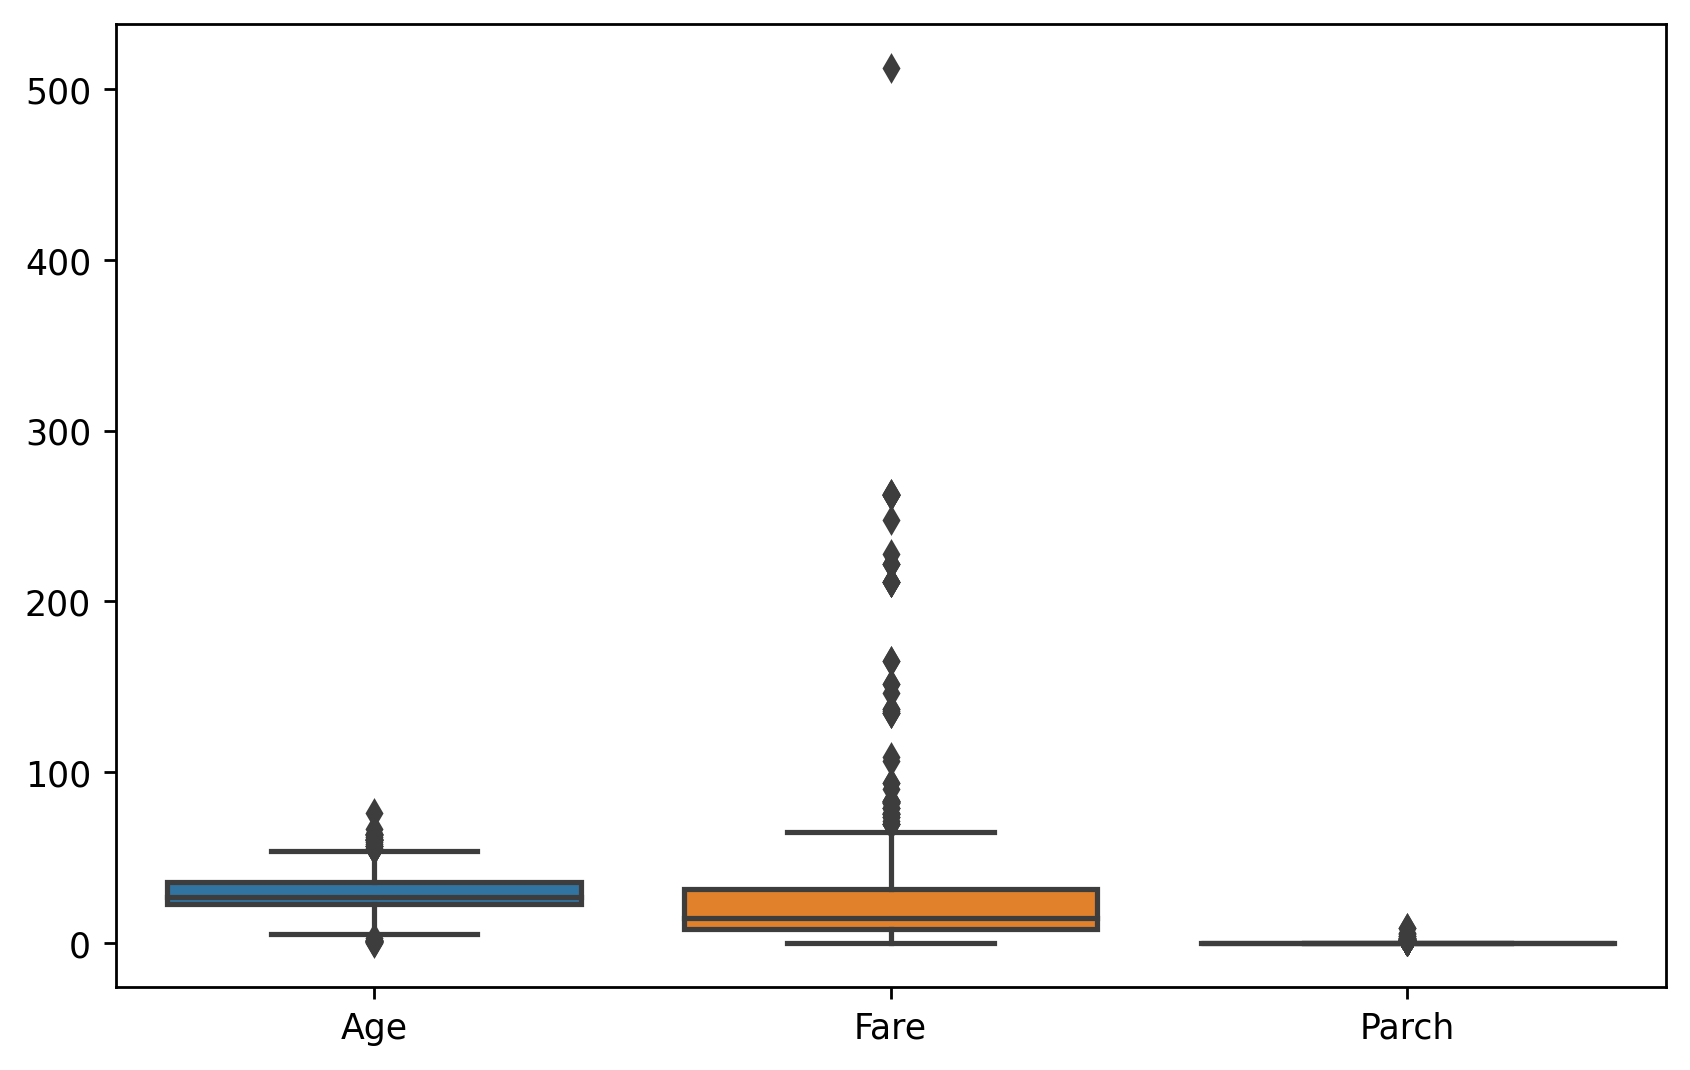

In [70]:
sns.boxplot(df_test[['Age','Fare','Parch']])

In [71]:
def outlier_capping(data, columns):
    Q1 = df_test[columns].quantile(0.25)
    Q3 = df_test[columns].quantile(0.75)
    IQR = Q3 -Q1
    
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    
    df_test[columns] = df_test[columns].clip(lower=lower_cap, upper=upper_cap, axis = 1)
    return df_test

cap_columns = ['Fare']
cap_df_test = outlier_capping(df_test, cap_columns)

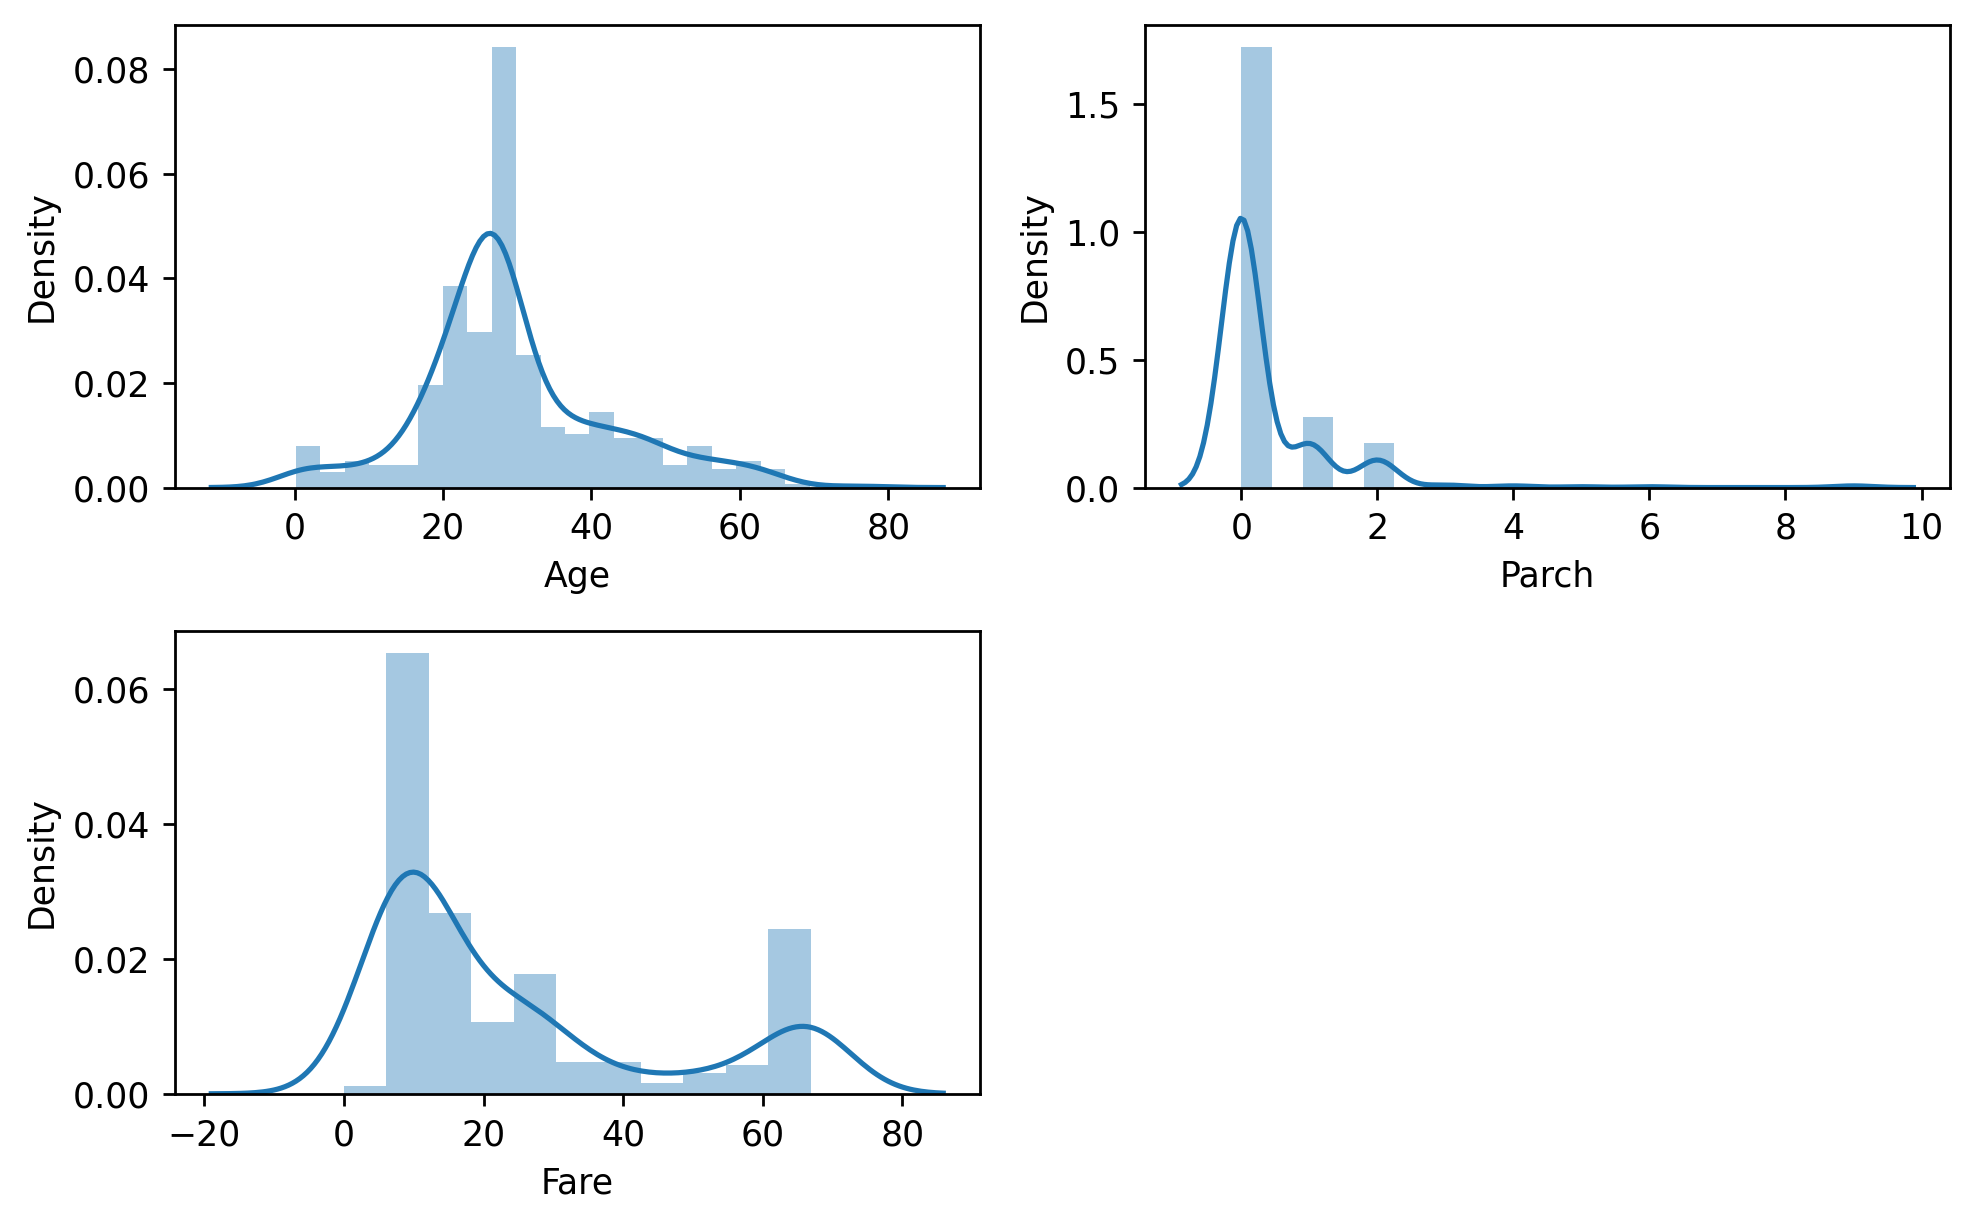

In [72]:
plt.subplot(2,2,1)
sns.distplot(x = df_test['Age'])
plt.xlabel('Age')

plt.subplot(2,2,2)
sns.distplot(x = df_test['Parch'])
plt.xlabel('Parch')

plt.subplot(2,2,3)
sns.distplot(x = df_test['Fare'])
plt.xlabel('Fare')

plt.tight_layout()

In [73]:
df_test['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [74]:
df_test['Parch'] = np.where(df_test['Parch'] > 2, 2.5, df_test['Parch'])
df_test['Parch'].value_counts()

0.0    324
1.0     52
2.0     33
2.5      9
Name: Parch, dtype: int64

In [75]:
df_test = pd.get_dummies(df_test, columns=['Parch','Sex','Embarked'],drop_first=True)

In [76]:
label_encoder1 = LabelEncoder()
df_test['Pclass_Label'] = label_encoder1.fit_transform(df_test['Pclass'])

In [77]:
df_test

PassengerId  Pclass   Age  SibSp       Fare  Parch_1.0  Parch_2.0  \
0            892       3  34.5      0   7.829200          0          0   
1            893       3  47.0      1   7.000000          0          0   
2            894       2  62.0      0   9.687500          0          0   
3            895       3  27.0      0   8.662500          0          0   
4            896       3  22.0      1  12.287500          1          0   
..           ...     ...   ...    ...        ...        ...        ...   
413         1305       3  27.0      0   8.050000          0          0   
414         1306       1  39.0      0  66.835988          0          0   
415         1307       3  38.5      0   7.250000          0          0   
416         1308       3  27.0      0   8.050000          0          0   
417         1309       3  27.0      1  22.358300          1          0   

     Parch_2.5  Sex_male  Embarked_Q  Embarked_S  Pclass_Label  
0            0         1           1           0             2  
1            0         0           0           1             2  
2            0         1           1           0             1  
3            0         1           0           1             2  
4            0         0           0           1             2  
..         ...       ...         ...         ...           ...  
413          0         1           0           1             2  
414          0         0           0           0             0  
415          0         1           0           1             2  
416          0         1           0           1             2  
417          0         1           0           0             2  

[418 rows x 12 columns]

In [78]:
df_test.drop(columns='Pclass', inplace=True)
df_test

PassengerId   Age  SibSp       Fare  Parch_1.0  Parch_2.0  Parch_2.5  \
0            892  34.5      0   7.829200          0          0          0   
1            893  47.0      1   7.000000          0          0          0   
2            894  62.0      0   9.687500          0          0          0   
3            895  27.0      0   8.662500          0          0          0   
4            896  22.0      1  12.287500          1          0          0   
..           ...   ...    ...        ...        ...        ...        ...   
413         1305  27.0      0   8.050000          0          0          0   
414         1306  39.0      0  66.835988          0          0          0   
415         1307  38.5      0   7.250000          0          0          0   
416         1308  27.0      0   8.050000          0          0          0   
417         1309  27.0      1  22.358300          1          0          0   

     Sex_male  Embarked_Q  Embarked_S  Pclass_Label  
0           1           1           0             2  
1           0           0           1             2  
2           1           1           0             1  
3           1           0           1             2  
4           0           0           1             2  
..        ...         ...         ...           ...  
413         1           0           1             2  
414         0           0           0             0  
415         1           0           1             2  
416         1           0           1             2  
417         1           0           0             2  

[418 rows x 11 columns]

In [79]:
data1 = df_test
vif1 = pd.DataFrame()
vif1['features'] = data.columns
vif1['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif1

features       VIF
0           Age  5.530057
1         SibSp  1.926434
2          Fare  3.861087
3     Parch_1.0  1.381419
4     Parch_2.0  1.552467
5     Parch_2.5  1.082374
6      Sex_male  2.815058
7    Embarked_Q  1.480288
8    Embarked_S  4.400431
9  Pclass_Label  4.238889

In [80]:
# Vif values are similar to train data set with high vif value of Age column

## Model Building

In [81]:
x_train = df_train.drop(columns='Survived',axis=1)
y_train = df_train['Survived']

In [82]:
x_test = df_test.drop(columns='PassengerId',axis=1)

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
model = LogisticRegression()

In [85]:
model.fit(x_train, y_train)

LogisticRegression()

In [86]:
y_hat = model.predict(x_train)
train_resid = y_train - y_hat

<Axes: xlabel='Survived', ylabel='Density'>

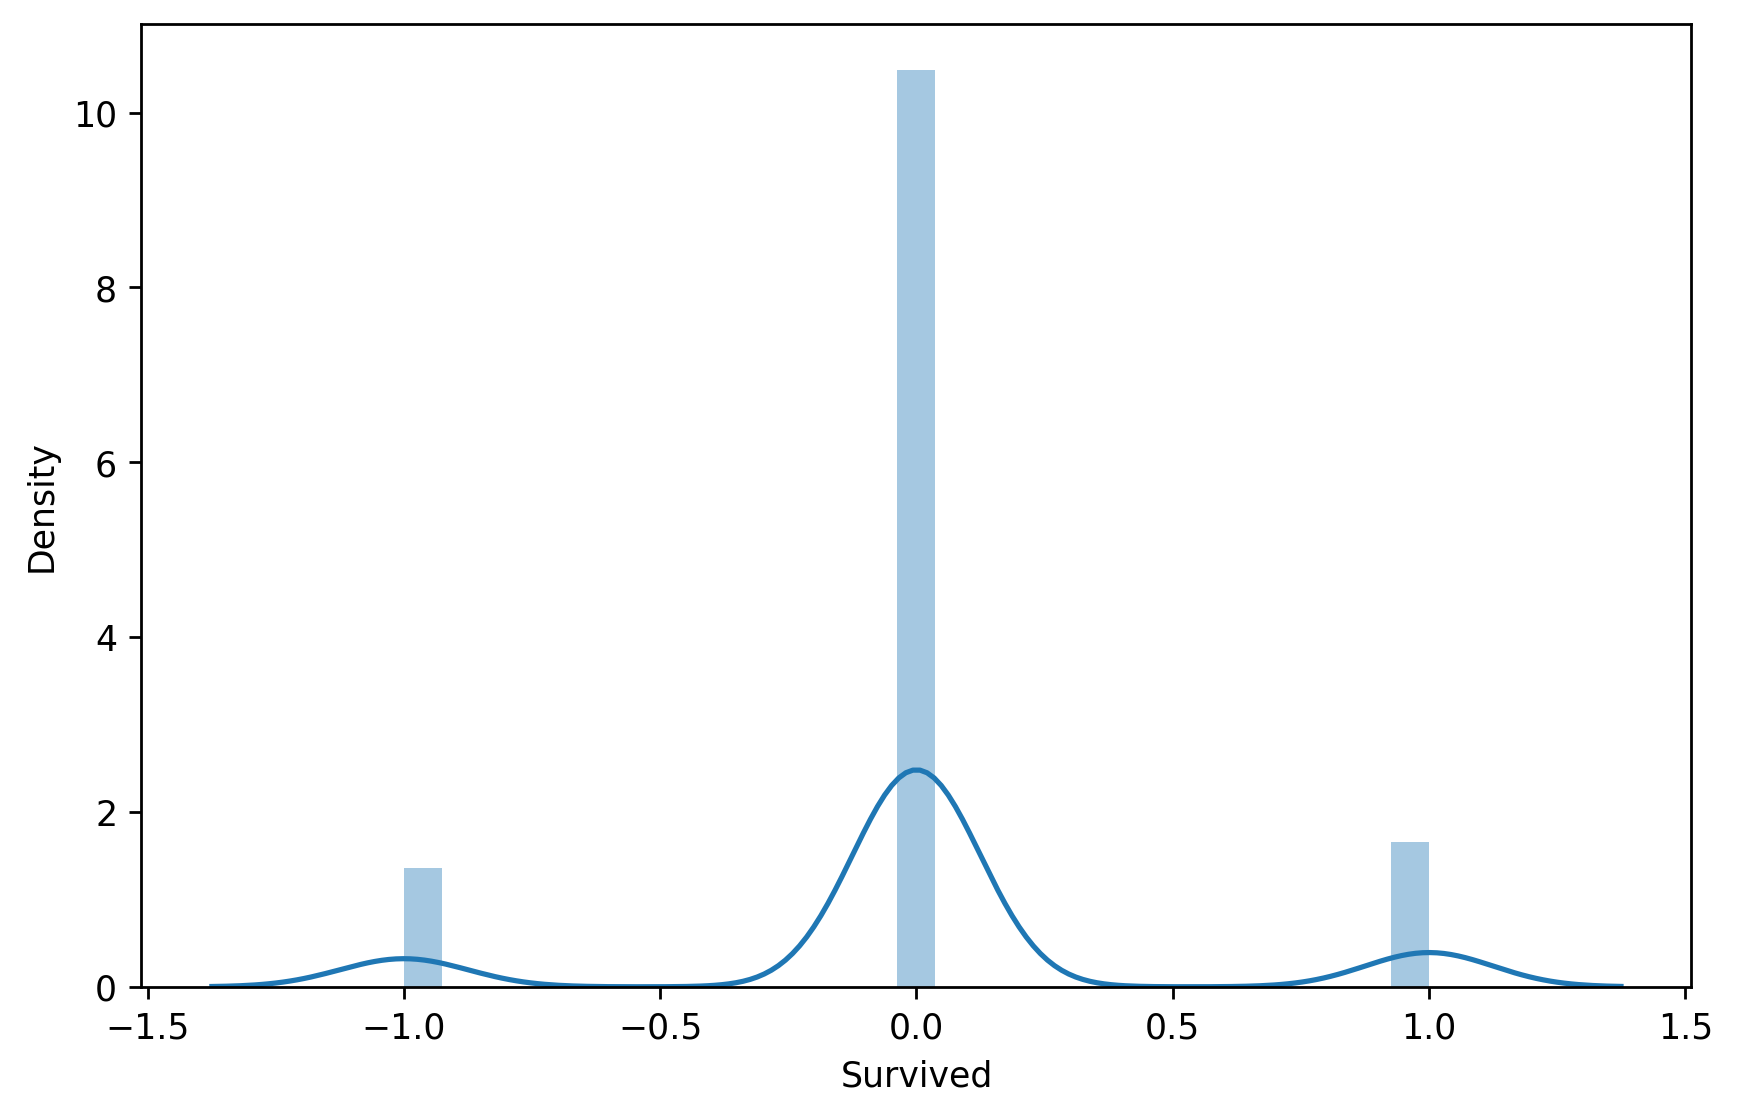

In [87]:
sns.distplot(train_resid)

In [88]:
# Bin at (-1) shows where model predicted 0, but actual value was 1.
# Bin at (+1) shows where model predicted 1, but actual value was 0.
# Bin at (0) shows model data matched with actual data.
# Bin at (0) is highest showing majority of predicted values matched our actual values.
# This shows model performace is good, at least for training dataset.

In [89]:
model.score(x_train,y_train)

0.7767741935483871

In [90]:
# Checking model for test data

In [91]:
x_test

Age  SibSp       Fare  Parch_1.0  Parch_2.0  Parch_2.5  Sex_male  \
0    34.5      0   7.829200          0          0          0         1   
1    47.0      1   7.000000          0          0          0         0   
2    62.0      0   9.687500          0          0          0         1   
3    27.0      0   8.662500          0          0          0         1   
4    22.0      1  12.287500          1          0          0         0   
..    ...    ...        ...        ...        ...        ...       ...   
413  27.0      0   8.050000          0          0          0         1   
414  39.0      0  66.835988          0          0          0         0   
415  38.5      0   7.250000          0          0          0         1   
416  27.0      0   8.050000          0          0          0         1   
417  27.0      1  22.358300          1          0          0         1   

     Embarked_Q  Embarked_S  Pclass_Label  
0             1           0             2  
1             0           1             2  
2             1           0             1  
3             0           1             2  
4             0           1             2  
..          ...         ...           ...  
413           0           1             2  
414           0           0             0  
415           0           1             2  
416           0           1             2  
417           0           0             2  

[418 rows x 10 columns]

In [92]:
y_pred = model.predict(x_test)

In [93]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [94]:
prediction = pd.DataFrame({'PassengerId': df_test['PassengerId'],'Survived':y_pred})
prediction.head(20)

PassengerId  Survived
0           892         0
1           893         0
2           894         0
3           895         0
4           896         1
5           897         0
6           898         1
7           899         0
8           900         1
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         1
15          907         1
16          908         0
17          909         0
18          910         1
19          911         1

In [95]:
# As we don't have target test column to check for accuracy of our model,
# We will split training dataset in train and test and calculate for metrics like accuracy, precision, f1score etc.

### Model No. 2

#### Splitting Training dataset in train and test

In [96]:
x1 = df_train.drop(columns=['Survived'])
y1 = df_train['Survived']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [99]:
model2 = LogisticRegression()
model2.fit(x1_train,y1_train)

LogisticRegression()

In [100]:
y1_hat = model2.predict(x1_train)

<Axes: ylabel='Density'>

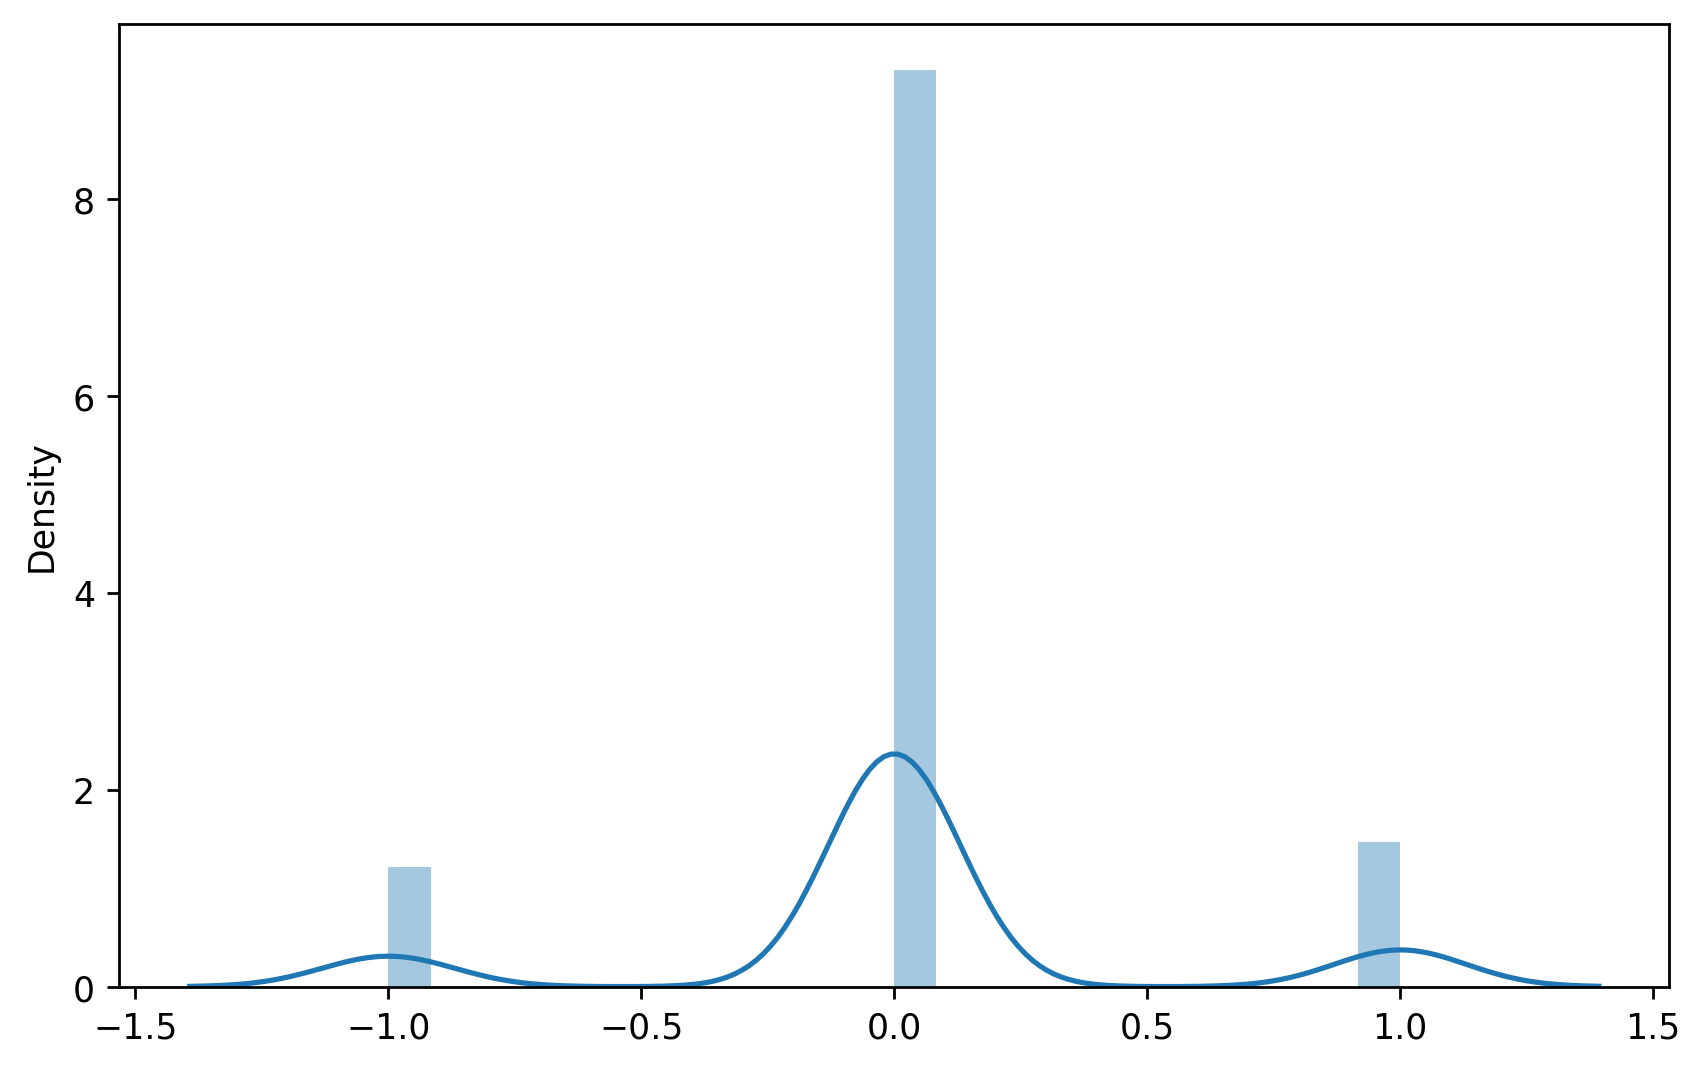

In [101]:
sns.distplot(x = y1_train - y1_hat)

In [102]:
model2.score(x1_train,y1_train)

0.7758064516129032

In [103]:
y1_pred = model2.predict(x1_test)

<Axes: xlabel='Survived', ylabel='Density'>

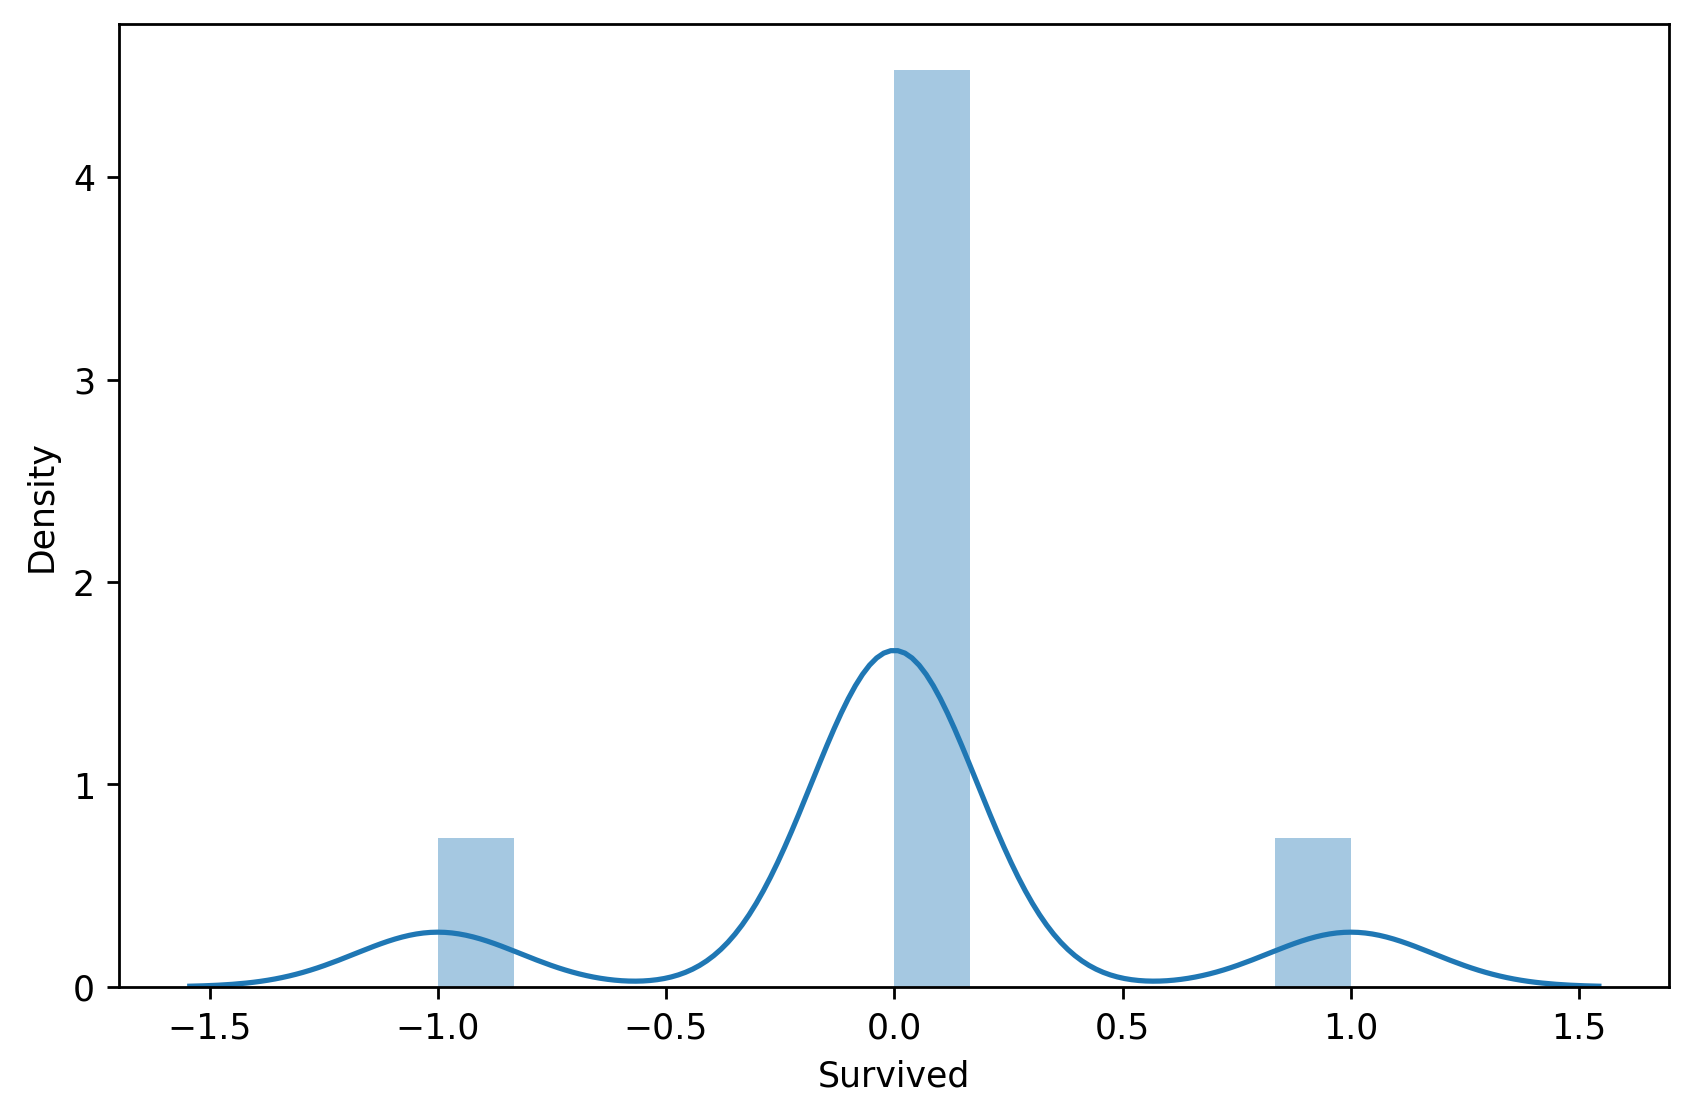

In [104]:
sns.distplot(y1_test - y1_pred)

In [105]:
model2.score(x1_test,y1_test)      

0.7548387096774194

In [106]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [107]:
confusion_matrix(y1_test,y1_pred)

array([[76, 19],
       [19, 41]], dtype=int64)

In [108]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        95
           1       0.68      0.68      0.68        60

    accuracy                           0.75       155
   macro avg       0.74      0.74      0.74       155
weighted avg       0.75      0.75      0.75       155



In [109]:
# Precision: The ratio of correctly predicted positive observations to the total predicted positives. 
# It answers the question, "What proportion of positive identifications was actually correct?"

    #Class 0: 0.80
    #Class 1: 0.68

#Recall (Sensitivity): The ratio of correctly predicted positive observations to the all observations in the actual class. 
#It answers the question, "What proportion of actual positives was identified correctly?"

    #Class 0: 0.80
    #Class 1: 0.68

#F1-Score: The weighted average of Precision and Recall. It is a better measure than accuracy for an imbalanced dataset.

    #Class 0: 0.80
    #Class 1: 0.68

#Support: The number of actual occurrences of the class in the specified dataset.

    #Class 0: 95
    #Class 1: 60

#Accuracy: The ratio of correctly predicted observations to the total observations. 
#Accuracy is not the best metric if the classes are imbalanced.

    #Overall Accuracy: 0.75

#Macro Average: The average of Precision, Recall, and F1-Score, calculated for each class 
#and then averaged (does not take class imbalance into account).

    #Precision: 0.74
    #Recall: 0.74
    #F1-Score: 0.74

#Weighted Average: The average of Precision, Recall, and F1-Score, calculated for each class and then averaged, 
#weighted by the number of true instances for each class (takes class imbalance into account).

    #Precision: 0.75
    #Recall: 0.75
    #F1-Score: 0.75

In [110]:
# Our Model performs better at predicting passengers who did not survive (Class 0) compared to those who did survive (Class 1).

In [111]:
proba = model2.predict_proba(x1_test)[:,1]
proba

array([0.08238911, 0.3670845 , 0.09958052, 0.90437985, 0.55267113,
       0.79478029, 0.14287159, 0.32094391, 0.07290826, 0.95603543,
       0.94036936, 0.1267158 , 0.09585489, 0.20655875, 0.09165106,
       0.77024022, 0.56326493, 0.25276486, 0.17285586, 0.05975846,
       0.16763112, 0.68870505, 0.147281  , 0.91645773, 0.55619522,
       0.70645321, 0.5928129 , 0.25446507, 0.60819611, 0.64779198,
       0.29505588, 0.06871275, 0.59834567, 0.92643729, 0.72430792,
       0.46109535, 0.57757903, 0.5272078 , 0.50795742, 0.25005638,
       0.67013703, 0.38498334, 0.4927659 , 0.26670828, 0.1199231 ,
       0.69877722, 0.04025277, 0.73899954, 0.9587853 , 0.16535067,
       0.2678396 , 0.75187451, 0.39940069, 0.18973174, 0.13861851,
       0.42888699, 0.37852758, 0.95509966, 0.52383307, 0.75640239,
       0.08938705, 0.92778064, 0.68151779, 0.57564824, 0.38934531,
       0.31495809, 0.88665276, 0.48447229, 0.16824805, 0.27975413,
       0.17594335, 0.12573686, 0.3630086 , 0.70911484, 0.43462

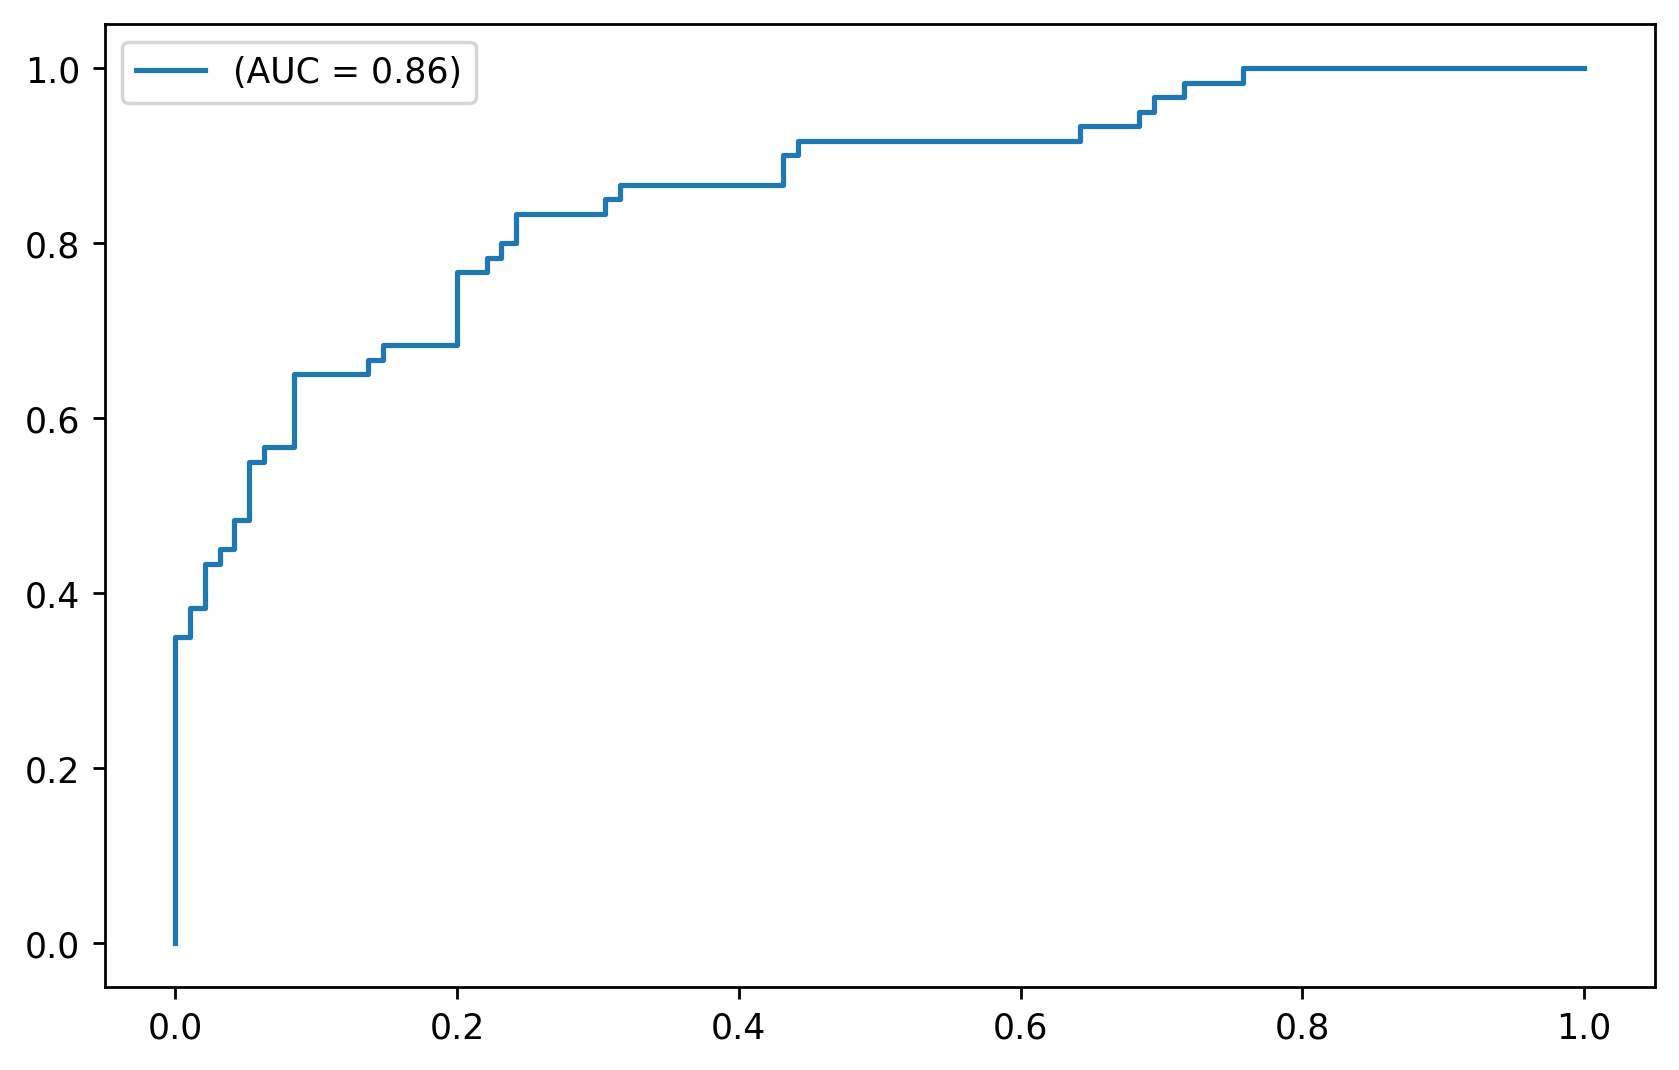

In [112]:
auc = roc_auc_score(y1_test,proba)

fpr,tpr, threshold = roc_curve(y1_test,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [113]:
auc

0.857719298245614

In [114]:
# AUC-ROC (Area Under the Receiver Operating Characteristic Curve) is a performance measurement for classification problems
    # at various threshold settings.
#The ROC curve is a plot of the true positive rate (recall) against the false positive rate (1-specificity).
# Our Model with an AUC score of 0.8577 demonstrates good performance in distinguishing between the classes.